In [169]:
# For data manipulation
import pandas as pd
import numpy as np

# For visualizations
import matplotlib.pyplot as plt
from pywaffle import Waffle
import squarify

Starting with a small set of data that has the percent market share for all major film studios, from January 1 to October 6, 2019.

In [170]:
studios_df = pd.read_csv('studios.csv')
studios_df

,studio,percent_market_share
0,Buena Vista,32.8
1,Warner Bros.,14.4
2,Universal,13.6
3,Sony / Columbia,11.0
4,Lionsgate,6.6
5,Paramount,4.7
6,20th Century Fox,3.8
7,STX Entertainment,3.0
8,Focus Features,1.6
9,United Artists,1.3


Let's start by making a pie chart! More for comparison purposes than practical (color choices are particularly ugly, but the defaults aren't much better).

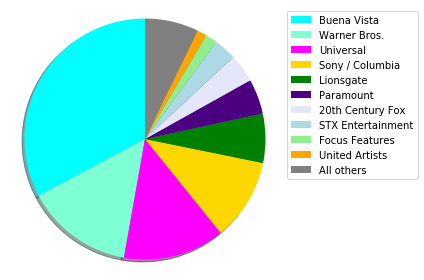

In [171]:
titles = studios_df.studio.tolist()
sales_prop = studios_df.percent_market_share.tolist()
colors = ['aqua', 'aquamarine', 'fuchsia', 'gold', 'green','indigo', 'lavender', 'lightblue', 'lightgreen', 'orange','grey']
patches, texts = plt.pie(sales_prop, shadow=True, startangle=90, colors = colors)
plt.legend(patches, titles, loc="best", bbox_to_anchor=(1,1))
plt.axis('equal')
plt.tight_layout()
plt.show();

### Bar chart
Here is an example using a bar plot instead of pie chart with the same data.  

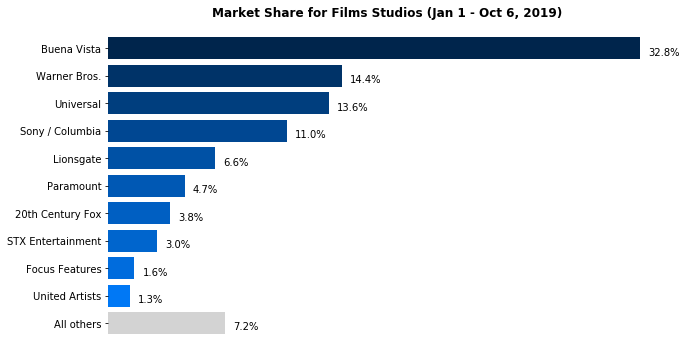

In [172]:
fig, ax = plt.subplots(figsize=(10,6))

fig.patch.set_visible(False)

colors = ['#00254c', '#003368', '#003e7e', '#004792', '#0051a5',
         '#0058b4', '#005fc2', '#0065cd', '#006cdd', '#0078f5', 'lightgrey']

y_pos = np.arange(len(titles))
ax.barh(y_pos, sales_prop, align='center', color=colors)
ax.set_yticks(y_pos)
ax.set_yticklabels(titles)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_title('Market Share for Films Studios (Jan 1 - Oct 6, 2019)', fontweight='bold')
# Hide the right and top spines
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xticks([])

for i, v in enumerate(sales_prop):
    ax.text(v + .5, i+ .25, (str(v) + "%"), color='black')
    
plt.show();

### Stacked bar chart
Started to build an example of a stacked bar. I don't think this one is complete, needs better colors and labeling on the pieces, but a starting point of an example of how to get one clean stacked bar.

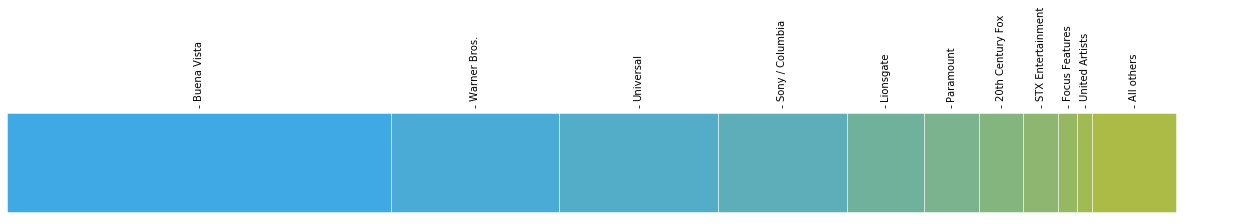

In [173]:
fig, ax = plt.subplots(figsize=(22,2))
stacked_colors = ["#3fa9e5","#49abd6","#53acc8","#5daeb9","#70b19c",
                    "#7ab38e","#84b57f","#8eb670","#97b862","#a1ba53",
                  "#abbb45"]

x_ticks = []
x_centers = []
y_pos = [0]
left_pos = 0
width = 1
for idx in range(len(titles)):
    segdata = studios_df.iloc[idx]
    segval = segdata['percent_market_share']
    seglabel = segdata['studio'] + " : " + str(segval) + "%"
    segcol = stacked_colors[idx]
    ax.barh(y_pos, [segval], width, align='center', color=segcol, label=seglabel,
            left=left_pos, edgecolor=['white', 'white'], linewidth=0.5)
    x_ticks.append(left_pos)
    x_centers.append(left_pos + (segval / 2))
    left_pos += segval
     
label_ticks = [start + (val / 2) for start, val in zip(x_ticks, sales_prop)]
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_yticks([])
ax.set_xticks(label_ticks)
ax.set_xticklabels(titles, rotation=90)

ax.xaxis.tick_top()
plt.show;

### Waffle chart

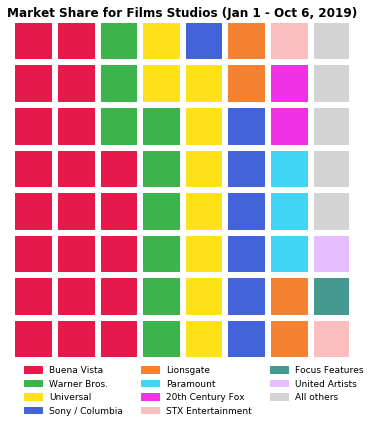

In [194]:
waffle_colors = ["#e6194B", "#3cb44b", "#ffe119", "#4363d8", "#f58231", 
                    "#42d4f4", "#f032e6", "#fabebe", "#469990", "#e6beff", 
                    "lightgrey"]

fig = plt.figure(
    FigureClass=Waffle,
    figsize=(6,6),
    rows = 8,
    columns=8,
    values= {studio: perc for studio, perc in 
             zip(titles, sales_prop)},
    labels=titles,
    title= {
            'label': 'Market Share for Films Studios (Jan 1 - Oct 6, 2019)',
            'fontweight': 'bold'

            },
    legend= {
            'loc': 'lower left',
            'bbox_to_anchor': (0, -0.2),
            'ncol': 3,
            'framealpha': 0,
            'fontsize': 9
            },
    colors=waffle_colors,
    
)
plt.show();

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


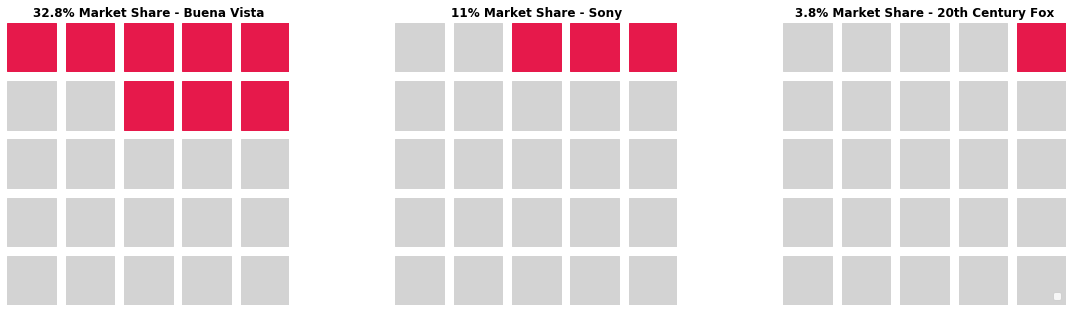

In [190]:
fox = sales_prop[:6] + sales_prop[7:]
fox.insert(0, sales_prop[6])

sony = sales_prop[:3] + sales_prop[4:]
sony.insert(0, sales_prop[3])

fig = plt.figure(
    figsize=(15,12),
    FigureClass=Waffle,
    plots={
        '131': {
            'values': list(reversed(sales_prop)),
            'colors': ['lightgrey', 'lightgrey', 'lightgrey',
                       'lightgrey', 'lightgrey','lightgrey',
                       'lightgrey', 'lightgrey', 'lightgrey',
                       'lightgrey', '#e6194B'],
            'title': {
                'label': '32.8% Market Share - Buena Vista',
                'fontweight': 'bold'
                    },
            'legend': {
                'labels': [],
                'loc': 'upper right',
                'bbox_to_anchor': (1.35, 1),
                'ncol': 1,
                'framealpha': 0,
                'fontsize': 9
                    }
        },
        '132': {
            'values': list(reversed(sony)),
            'colors': ['lightgrey', 'lightgrey', 'lightgrey',
                       'lightgrey', 'lightgrey','lightgrey',
                       'lightgrey', 'lightgrey', 'lightgrey',
                       'lightgrey', '#e6194B'],
            'title': {
                'label': '11% Market Share - Sony',
                'fontweight': 'bold'
                    },
            'legend': {
                'labels': [],
                'loc': 'upper right',
                'bbox_to_anchor': (1.35, 1),
                'ncol': 1,
                'framealpha': 0,
                'fontsize': 9
            }
        },
        '133': {
            'values': list(reversed(fox)),
            'colors': ['lightgrey', 'lightgrey', 'lightgrey',
                       'lightgrey', 'lightgrey','lightgrey',
                       'lightgrey', 'lightgrey', 'lightgrey',
                       'lightgrey', '#e6194B'],
            'title': {
                'label': '3.8% Market Share - 20th Century Fox',
                'fontweight': 'bold'
                    },
            'legend': {
                'labels': [],
                'loc': 'lower right'
            } 
        },
    },
    rows=5,
    columns=5,
    tight_layout=True,
    vertical=True
    
)

### Treemap

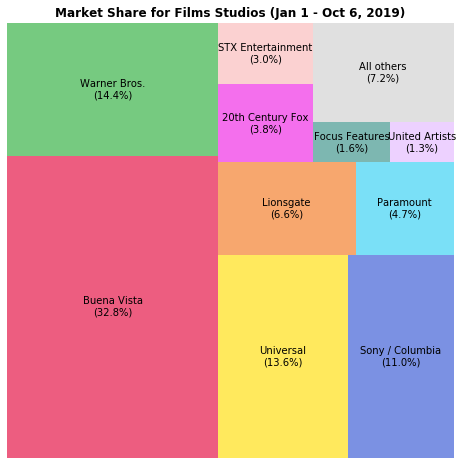

In [200]:
plt.figure(figsize=(8,8))
plt.title('Market Share for Films Studios (Jan 1 - Oct 6, 2019)',fontweight='bold')
titles_with_perc = [str(studio) + "\n(" + str(val) + "%)" for studio, val, in zip(titles, sales_prop)]
squarify.plot(sizes=sales_prop, 
              label=titles_with_perc,
              color=waffle_colors,
              alpha=.7 )
plt.axis('off')
plt.show(); 